In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/insurance.csv')


In [ ]:
#data.loc[data["sex"] == "female","sex"] = 1
# data.loc[data["sex"] == "male","sex"] = 0
# data.loc[data["smoker"] == "yes","smoker"] = 1
# data.loc[data["smoker"] == "no","smoker"] = 0
# #scikit.LabelEncoder
df = pd.get_dummies(df)

In [ ]:
col = df.pop("charges")
df['charges'] = col



In [ ]:
df

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,1,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,0,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,0,1,1,0,0,0,1,0,4449.46200
3,33,22.705,0,0,1,1,0,0,1,0,0,21984.47061
4,32,28.880,0,0,1,1,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0,10600.54830
1334,18,31.920,0,1,0,1,0,1,0,0,0,2205.98080
1335,18,36.850,0,1,0,1,0,0,0,1,0,1629.83350
1336,21,25.800,0,1,0,1,0,0,0,0,1,2007.94500


In [ ]:
df = df.drop(["region_northeast",'sex_male','smoker_no'],axis=1)

In [ ]:
df

,age,bmi,children,sex_female,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,1,1,0,0,1,16884.92400
1,18,33.770,1,0,0,0,1,0,1725.55230
2,28,33.000,3,0,0,0,1,0,4449.46200
3,33,22.705,0,0,0,1,0,0,21984.47061
4,32,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0,1,0,0,10600.54830
1334,18,31.920,0,1,0,0,0,0,2205.98080
1335,18,36.850,0,1,0,0,1,0,1629.83350
1336,21,25.800,0,1,0,0,0,1,2007.94500


# 2.) Split the data into 80/20, in/out sample

In [ ]:
import numpy as np


In [ ]:
data = np.array(df.iloc[:,:-1]) 
target = np.array(df.iloc[:,-1])

In [ ]:
cut = int((len(data) * .8) //1)

In [ ]:
in_data = data[:cut] 
out_data = data[cut:]

In [ ]:
in_target = target[:cut] 
out_target = target[cut:]

# 3.) Normalize the Data

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

In [ ]:
modCV = LassoCV().fit(in_data_scale, in_target)

In [ ]:
modCV.alpha_

115.9799859390741

In [ ]:
a = modCV.alpha_

In [ ]:
data

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

# 5.) Run a lambda regression with that Lambda

In [ ]:
from sklearn.linear_model import Lasso
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)
mod1.predict(np.array(in_data_scale))

array([25046.14985128,  3852.3192492 ,  6841.71897586, ...,
       11950.8312905 , 11827.45873707, 12387.21005137])

In [ ]:
mod1.coef_

array([3580.3074613 , 1897.53153919,  415.07757809,    0.        ,
       9345.08326014,   -0.        , -158.75999716, -238.95871272])

# 6.) Visualize the coefficients 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [ ]:
column_names = list(df.columns.values) 
column_names = column_names[:-1]

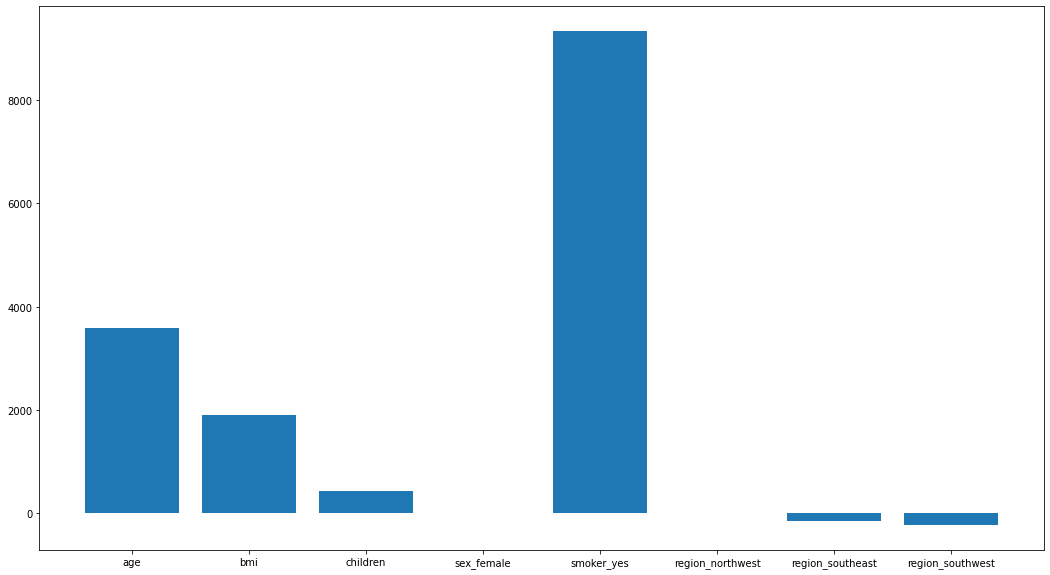

In [ ]:
figure(figsize = (18,10)) 
plt.bar(column_names, mod1.coef_) 
plt.show()

# 7.) Interpret the coefficients

Smoking, age, bmi affect the charge the most. The older the person is, the more he smokes, the higher the bmi, the more the insurance company would want to charge them.

# 8.) Compare in and out of sample MSE’sv

In [ ]:
train_pred = mod1.predict(in_data_scale)

In [ ]:
test_pred = mod1.predict(out_data_scale)

In [ ]:
import sklearn
from sklearn import metrics

In [ ]:
np.sqrt(sklearn.metrics.mean_squared_error(in_target, train_pred))

6043.321774032932

In [ ]:
np.sqrt(sklearn.metrics.mean_squared_error(out_target,test_pred))

6095.273099257613